In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
os.listdir('/content/drive/MyDrive/LendingClub')

['LCDataDictionary.xlsx', 'loan.csv']

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/LendingClub/loan.csv', low_memory=False)


In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(2260668, 145)

In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [8]:
df['loan_status'].value_counts()


,count
loan_status,
Fully Paid,1041952
Current,919695
Charged Off,261655
Late (31-120 days),21897
In Grace Period,8952
Late (16-30 days),3737
Does not meet the credit policy. Status:Fully Paid,1988
Does not meet the credit policy. Status:Charged Off,761
Default,31


In [9]:
bad_status = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off',
    'Late (31-120 days)'
]

df['target'] = df['loan_status'].apply(lambda x: 1 if x in bad_status else 0)


In [10]:
df['target'].value_counts()


,count
target,
0,1976324
1,284344


In [11]:
df['target'].value_counts(normalize=True)*100


,proportion
target,
0,87.422125
1,12.577875


<Axes: xlabel='target'>

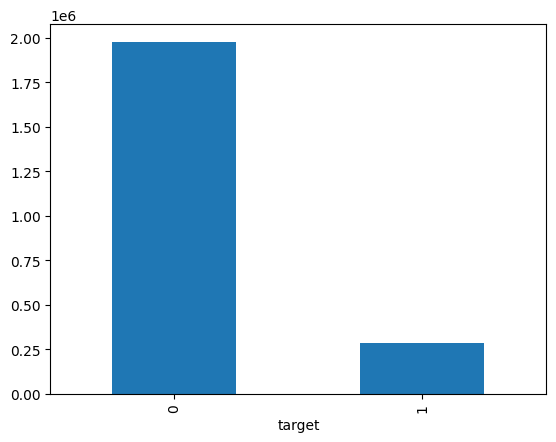

In [12]:
df['target'].value_counts().plot(kind='bar')


In [13]:
df.isnull().sum().sort_values(ascending=False).head(20)


,0
id,2260668
member_id,2260668
url,2260668
orig_projected_additional_accrued_interest,2252242
deferral_term,2250055
hardship_start_date,2250055
hardship_loan_status,2250055
hardship_payoff_balance_amount,2250055
hardship_end_date,2250055
hardship_type,2250055


In [14]:
(df.isnull().mean() * 100).sort_values(ascending=False).head(20)


,0
id,100.000000
member_id,100.000000
url,100.000000
orig_projected_additional_accrued_interest,99.627278
deferral_term,99.530537
hardship_start_date,99.530537
hardship_loan_status,99.530537
hardship_payoff_balance_amount,99.530537
hardship_end_date,99.530537
hardship_type,99.530537


In [15]:
missing_percent = df.isnull().mean()
cols_to_drop = missing_percent[missing_percent > 0.40].index
df = df.drop(columns=cols_to_drop)


In [16]:
(df.isnull().mean() * 100).sort_values(ascending=False).head(20)


,0
all_util,38.322655
inq_last_12m,38.313012
open_acc_6m,38.313012
total_cu_tl,38.313012
open_act_il,38.312968
open_il_24m,38.312968
open_il_12m,38.312968
total_bal_il,38.312968
max_bal_bc,38.312968
open_rv_24m,38.312968


In [18]:
df = df.fillna(df.median(numeric_only=True))

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [19]:
df.isnull().sum().sum()


np.int64(0)

In [20]:
df.describe()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,target
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,...,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06
mean,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799241e+04,1.882345e+01,3.068752e-01,5.768277e-01,1.161239e+01,...,2.074369e+00,9.429794e+01,4.227057e+01,1.281161e-01,4.676892e-02,1.762550e+05,5.073172e+04,2.304120e+04,4.338894e+04,1.257788e-01
std,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126961e+05,1.417799e+01,8.672255e-01,8.859598e-01,5.640826e+00,...,1.802080e+00,8.952849e+00,3.561827e+01,3.645165e-01,3.775252e-01,1.790745e+05,4.939381e+04,2.277315e+04,4.440820e+04,3.315999e-01
min,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.190000e+01,0.000000e+00,0.000000e+00,8.000000e+00,...,1.000000e+00,9.170000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.200300e+04,2.126000e+04,8.500000e+03,1.548800e+04,0.000000e+00
50%,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,0.000000e+00,1.100000e+01,...,2.000000e+00,1.000000e+02,3.750000e+01,0.000000e+00,0.000000e+00,1.142985e+05,3.786400e+04,1.630000e+04,3.269600e+04,0.000000e+00
75%,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.448000e+01,0.000000e+00,1.000000e+00,1.400000e+01,...,3.000000e+00,1.000000e+02,6.670000e+01,0.000000e+00,0.000000e+00,2.522000e+05,6.347100e+04,2.990000e+04,5.760200e+04,0.000000e+00
max,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,3.300000e+01,1.010000e+02,...,3.200000e+01,1.000000e+02,1.000000e+02,1.200000e+01,8.500000e+01,9.999999e+06,3.408095e+06,1.569000e+06,2.118996e+06,1.000000e+00


In [21]:
important_cols = [
    'loan_amnt','int_rate','installment','annual_inc','dti',
    'revol_bal','revol_util','open_acc','total_acc',
    'delinq_2yrs','inq_last_6mths','grade','sub_grade'
]
df[important_cols].describe()



,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util,open_acc,total_acc,delinq_2yrs,inq_last_6mths
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06
mean,1.504693e+04,1.309291e+01,4.458076e+02,7.799241e+04,1.882345e+01,1.665846e+04,5.033767e+01,1.161239e+01,2.416252e+01,3.068752e-01,5.768277e-01
std,9.190245e+03,4.832114e+00,2.671737e+02,1.126961e+05,1.417799e+01,2.294831e+04,2.470322e+01,5.640826e+00,1.198745e+01,8.672255e-01,8.859598e-01
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.190000e+01,5.950000e+03,3.150000e+01,8.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
50%,1.290000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,1.132400e+04,5.030000e+01,1.100000e+01,2.200000e+01,0.000000e+00,0.000000e+00
75%,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.448000e+01,2.024600e+04,6.930000e+01,1.400000e+01,3.100000e+01,0.000000e+00,1.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,2.904836e+06,8.923000e+02,1.010000e+02,1.760000e+02,5.800000e+01,3.300000e+01


In [22]:
df['dti'] = df['dti'].clip(upper=100)


In [23]:
df['revol_util'] = df['revol_util'].clip(upper=100)


In [24]:
df['annual_inc'] = df['annual_inc'].clip(upper=df['annual_inc'].quantile(0.99))


In [25]:
import numpy as np
df['log_annual_inc'] = np.log1p(df['annual_inc'])


/tmp/ipython-input-3311462095.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['log_annual_inc'] = np.log1p(df['annual_inc'])


In [26]:
X = df.drop(columns=['loan_status', 'target'])
y = df['target']


In [27]:
X.shape, y.shape


((2260668, 99), (2260668,))

In [28]:
final_features = [
    'loan_amnt',
    'int_rate',
    'installment',
    'log_annual_inc',
    'dti',
    'revol_bal',
    'revol_util',
    'open_acc',
    'total_acc',
    'delinq_2yrs',
    'inq_last_6mths',
    'grade',
    'sub_grade'
]


In [29]:
X = df[final_features]
y = df['target']


In [30]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_cols, cat_cols


(Index(['loan_amnt', 'int_rate', 'installment', 'log_annual_inc', 'dti',
        'revol_bal', 'revol_util', 'open_acc', 'total_acc', 'delinq_2yrs',
        'inq_last_6mths'],
       dtype='object'),
 Index(['grade', 'sub_grade'], dtype='object'))

In [31]:
X_encoded = pd.get_dummies(
    X,
    columns=cat_cols,
    drop_first=True
)


In [32]:
del df
import gc
gc.collect()


150

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


In [35]:
X_encoded.shape


(2260668, 51)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    stratify=y,
    random_state=42
)


In [37]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


,proportion
target,
0,0.874221
1,0.125779


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from scipy.stats import ks_2samp

logreg_lc = LogisticRegression(max_iter=1000, n_jobs=-1)
logreg_lc.fit(X_train_scaled, y_train)

y_pred_proba_lc = logreg_lc.predict_proba(X_test_scaled)[:, 1]


In [40]:
logreg_lc_results = {}

logreg_lc_results['AUC'] = roc_auc_score(y_test, y_pred_proba_lc)
logreg_lc_results['KS'] = ks_2samp(
    y_pred_proba_lc[y_test == 0],
    y_pred_proba_lc[y_test == 1]
).statistic

y_pred_lc = (y_pred_proba_lc >= 0.5).astype(int)
report_lc = classification_report(y_test, y_pred_lc, output_dict=True)

logreg_lc_results['Recall_Default'] = report_lc['1']['recall']
logreg_lc_results['Precision_Default'] = report_lc['1']['precision']

logreg_lc_results


{'AUC': np.float64(0.7098383356943587),
 'KS': np.float64(0.3018997359640251),
 'Recall_Default': 0.010283318796950174,
 'Precision_Default': 0.39132762312633834}

In [41]:
from sklearn.model_selection import train_test_split

X_sample, _, y_sample, _ = train_test_split(
    X_encoded,
    y,
    train_size=0.25,   # 25% sample
    stratify=y,
    random_state=42
)


In [42]:
X_sample.shape, y_sample.shape


((565167, 51), (565167,))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sample,
    y_sample,
    test_size=0.25,
    stratify=y_sample,
    random_state=42
)


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from scipy.stats import ks_2samp

logreg_lc = LogisticRegression(max_iter=1000, n_jobs=-1)
logreg_lc.fit(X_train_scaled, y_train)

y_pred_proba_lc = logreg_lc.predict_proba(X_test_scaled)[:,1]


In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_lc = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_leaf=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_lc.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=100, n_jobs=-1, random_state=42)

In [47]:
X_sample.shape


(565167, 51)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sample,
    y_sample,
    test_size=0.25,
    stratify=y_sample,
    random_state=42
)


In [49]:
X_train.shape, X_test.shape


((423875, 51), (141292, 51))

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


In [51]:
from sklearn.linear_model import LogisticRegression

logreg_lc = LogisticRegression(max_iter=1000, n_jobs=-1)
logreg_lc.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, n_jobs=-1)

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_lc = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_leaf=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_lc.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=100, n_jobs=-1, random_state=42)

In [53]:
X_train.shape, X_test.shape


((423875, 51), (141292, 51))

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from scipy.stats import ks_2samp

logreg_lc = LogisticRegression(max_iter=1000, n_jobs=-1)
logreg_lc.fit(X_train_scaled, y_train)

y_pred_proba_lc = logreg_lc.predict_proba(X_test_scaled)[:,1]


In [56]:
logreg_lc_results = {}

logreg_lc_results['AUC'] = roc_auc_score(y_test, y_pred_proba_lc)
logreg_lc_results['KS'] = ks_2samp(
    y_pred_proba_lc[y_test == 0],
    y_pred_proba_lc[y_test == 1]
).statistic

y_pred_lc = (y_pred_proba_lc >= 0.5).astype(int)
report_lc = classification_report(y_test, y_pred_lc, output_dict=True)

logreg_lc_results['Recall_Default'] = report_lc['1']['recall']
logreg_lc_results['Precision_Default'] = report_lc['1']['precision']

logreg_lc_results


{'AUC': np.float64(0.7121384534777884),
 'KS': np.float64(0.3086100920380082),
 'Recall_Default': 0.008215169930227324,
 'Precision_Default': 0.33796296296296297}

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_lc = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_leaf=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_lc.fit(X_train, y_train)

y_pred_proba_rf_lc = rf_lc.predict_proba(X_test)[:,1]


In [58]:
rf_lc_results = {}

rf_lc_results['AUC'] = roc_auc_score(y_test, y_pred_proba_rf_lc)
rf_lc_results['KS'] = ks_2samp(
    y_pred_proba_rf_lc[y_test == 0],
    y_pred_proba_rf_lc[y_test == 1]
).statistic

y_pred_rf_lc = (y_pred_proba_rf_lc >= 0.5).astype(int)
report_rf_lc = classification_report(y_test, y_pred_rf_lc, output_dict=True)

rf_lc_results['Recall_Default'] = report_rf_lc['1']['recall']
rf_lc_results['Precision_Default'] = report_rf_lc['1']['precision']

rf_lc_results


{'AUC': np.float64(0.7048216590030281),
 'KS': np.float64(0.29487050240000284),
 'Recall_Default': 0.7251294170605447,
 'Precision_Default': 0.19340847353334034}

In [59]:
lc_final = pd.DataFrame(
    [logreg_lc_results, rf_lc_results],
    index=['Logistic', 'Random_Forest']
)

lc_final


,AUC,KS,Recall_Default,Precision_Default
Logistic,0.712138,0.308610,0.008215,0.337963
Random_Forest,0.704822,0.294871,0.725129,0.193408


In [60]:
y_pred_proba_lc.min(), y_pred_proba_lc.max()


(np.float64(4.620646904090617e-06), np.float64(0.9756119989270597))

In [61]:
import numpy as np
from sklearn.metrics import classification_report

thresholds = np.arange(0.01, 0.31, 0.01)

for t in thresholds:
    y_pred_t = (y_pred_proba_lc >= t).astype(int)
    report_t = classification_report(y_test, y_pred_t, output_dict=True)
    recall = report_t['1']['recall']
    precision = report_t['1']['precision']
    print(f"Threshold {t:.2f} → Recall: {recall:.3f}, Precision: {precision:.3f}")


Threshold 0.01 → Recall: 1.000, Precision: 0.126
Threshold 0.02 → Recall: 0.996, Precision: 0.130
Threshold 0.03 → Recall: 0.985, Precision: 0.136
Threshold 0.04 → Recall: 0.976, Precision: 0.140
Threshold 0.05 → Recall: 0.962, Precision: 0.146
Threshold 0.06 → Recall: 0.941, Precision: 0.153
Threshold 0.07 → Recall: 0.910, Precision: 0.159
Threshold 0.08 → Recall: 0.877, Precision: 0.165
Threshold 0.09 → Recall: 0.843, Precision: 0.171
Threshold 0.10 → Recall: 0.806, Precision: 0.180
Threshold 0.11 → Recall: 0.764, Precision: 0.189
Threshold 0.12 → Recall: 0.717, Precision: 0.199
Threshold 0.13 → Recall: 0.670, Precision: 0.210
Threshold 0.14 → Recall: 0.617, Precision: 0.222
Threshold 0.15 → Recall: 0.561, Precision: 0.235
Threshold 0.16 → Recall: 0.502, Precision: 0.249
Threshold 0.17 → Recall: 0.449, Precision: 0.263
Threshold 0.18 → Recall: 0.400, Precision: 0.277
Threshold 0.19 → Recall: 0.357, Precision: 0.289
Threshold 0.20 → Recall: 0.318, Precision: 0.297
Threshold 0.21 → Rec

In [62]:
t=0.13

In [63]:
y_pred_lc_adj = (y_pred_proba_lc >= t).astype(int)
report_adj = classification_report(y_test, y_pred_lc_adj, output_dict=True)

logreg_lc_adj_results = {
    'AUC': logreg_lc_results['AUC'],
    'KS': logreg_lc_results['KS'],
    'Recall_Default': report_adj['1']['recall'],
    'Precision_Default': report_adj['1']['precision']
}

logreg_lc_adj_results


{'AUC': np.float64(0.7121384534777884),
 'KS': np.float64(0.3086100920380082),
 'Recall_Default': 0.6695926176007202,
 'Precision_Default': 0.20966207406885373}

In [64]:
# =========================
# Final Model Performance – LendingClub
# =========================
pd.DataFrame(
    [logreg_lc_adj_results, rf_lc_results],
    index=['Logistic_Calibrated', 'Random_Forest']
)


,AUC,KS,Recall_Default,Precision_Default
Logistic_Calibrated,0.712138,0.308610,0.669593,0.209662
Random_Forest,0.704822,0.294871,0.725129,0.193408


In [65]:
# ================================
# SAVE LENDINGCLUB MODELS (FINAL)
# ================================

from google.colab import drive
import joblib, os

# Directory to save models
model_dir = "/content/drive/MyDrive/credit_risk_models"
os.makedirs(model_dir, exist_ok=True)

# ---- Save Logistic Regression (calibrated) ----
joblib.dump(logreg_lc, f"{model_dir}/lc_logistic_model.pkl")
joblib.dump(scaler, f"{model_dir}/lc_scaler.pkl")
joblib.dump(X_train.columns.tolist(), f"{model_dir}/lc_feature_columns.pkl")
joblib.dump(t, f"{model_dir}/lc_threshold.pkl")

# ---- Save Random Forest ----
joblib.dump(rf_lc, f"{model_dir}/lc_random_forest_model.pkl")
joblib.dump(X_train.columns.tolist(), f"{model_dir}/lc_rf_feature_columns.pkl")

print("✅ LendingClub models saved successfully")
print(os.listdir(model_dir))


✅ LendingClub models saved successfully
['cibil_logistic_model.pkl', 'cibil_scaler.pkl', 'cibil_feature_columns.pkl', 'lc_logistic_model.pkl', 'lc_scaler.pkl', 'lc_feature_columns.pkl', 'lc_threshold.pkl', 'lc_random_forest_model.pkl', 'lc_rf_feature_columns.pkl']
